In [1]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '--'},
             {'c': 'red', 'linestyle': '-.'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '-.'}]
labels = ['H=1','H=2','H=3','H=4','H=5','H=6','H=7','H=8','H=9','H=10']

def cross_validation_(data, gamma_cand, i):
    g_scores = np.array([])
    clfs = []
    loss_log_train = []
    loss_log_test = []
    loss_cof = []                
    for g in gamma_cand:
        clf = svm.SVC(kernel='rbf', max_iter=2000, tol=0.001, probability=True,
                      gamma=g, random_state=0, verbose=False)
        scores = []
        l_log_train = []
        l_log_test = []
        l_cof = []
        for j in range(1, 6):        
            train_X, test_X, train_Y, test_Y = train_test_split(data['train_X'], data['train_Y'], 
                                                                test_size=0.2, random_state=None)        
            clf.fit(train_X, train_Y)
            # accuracy
            predict_Y = clf.predict(test_X)
            scores.append(accuracy_score(test_Y, predict_Y))          
        
            posterior_train_Y = clf.predict_proba(train_X)
            posterior_test_Y = clf.predict_proba(test_X)
                        
            # corss-entropy
            l_log_train.append(log_loss(train_Y, posterior_train_Y, normalize=True))
            l_log_test.append(log_loss(test_Y, posterior_test_Y, normalize=True))                             
        
        g_scores = np.append(g_scores, np.mean(scores))  
        loss_log_train.append(np.mean(l_log_train))
        loss_log_test.append(np.mean(l_log_test))                    
    
                      
        clfs.append(clf)  
    
    print('gamma:', gamma_cand)
    print('g scores:',g_scores*100)
    print('loss_train:', loss_log_train)
    print('loss_test:', loss_log_test)
    return (np.argmax(g_scores) + 1)


In [2]:
import numpy as np
import csv
def output_csv(result):
    fieldnames = result[0,:]
    with open('experiment_result/rbf_svm.csv', 'a') as csvfile:   
        resultwriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
        resultwriter.writeheader()
        for i in range(1, result.shape[0]):
            dict = {}
            for j in range(result.shape[1]):
                 dict[result[0,j]] = result[i,j]
            resultwriter.writerow(dict)


In [3]:
def train_test(clf, data):
        accu_train = []
        accu_test = []
        loss_train = []
        loss_test = []    
        t_last = []  
        
        train_X, train_Y, test_X, test_Y = data['train_X'], data['train_Y'], data['test_X'], data['test_Y']
        
        for j in range(0, repeat_times):
            t_begin = time.time()

            clf.fit(train_X, train_Y)       

            predict_train_Y = clf.predict(train_X)
            predict_test_Y = clf.predict(test_X)        
            t_last.append(time.time() - t_begin)

            posterior_train_Y = clf.predict_proba(train_X)
            posterior_test_Y = clf.predict_proba(test_X)

            accu_train.append(accuracy_score(predict_train_Y, train_Y))
            accu_test.append(accuracy_score(predict_test_Y, test_Y))

            loss_train.append(log_loss(train_Y, posterior_train_Y, normalize=True))
            loss_test.append(log_loss(test_Y, posterior_test_Y, normalize=True))

        cnf_matrix_train = confusion_matrix(predict_train_Y, data['train_Y'])
        cnf_matrix_test = confusion_matrix(predict_test_Y, data['test_Y'])               

        accu_train = round(np.mean(accu_train), 4)
        accu_test = round(np.mean(accu_test), 4)
        loss_train = round(np.mean(loss_train), 4)
        loss_test = round(np.mean(loss_test), 4)
        t_last = round(np.mean(t_last)*1000, 4)
        
        ''' report train and test error '''
        print('Average training data accuracy:', accu_train)
        print('Average testing data accuracy:', accu_test)

        ''' report train and test log loss'''
        print('Average training data log loss:', loss_train)
        print('Average testing data log loss:', loss_test) 
        print('Average Time ms', t_last)
        
        return accu_train, accu_test, loss_train, loss_test, t_last, cnf_matrix_train, cnf_matrix_test

In [4]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [5]:
# Module 1: setting the parameters
m_i = 1000
c = 0.0001
p = "l2"
eta = 0.1
repeat_times = 5
file_count = 5
class_names = ['0', '1']
kernel = 'linear'

Reading data from:  breast-cancer
Average training data accuracy: 0.9707
Average testing data accuracy: 0.9706
Average training data log loss: 0.0849
Average testing data log loss: 0.0711
Average Time ms 4.3067
c 0.0001 gamma 1 a_train 97.07000000000001 a_test 97.06 loss_train 0.0849 loss_test 0.0711 time=train+test 4.3067 ms
Confusion matrix, without normalization
[[185  10]
 [  6 346]]
Confusion matrix, without normalization
[[46  2]
 [ 2 86]]
Reading data from:  diabetes
Average training data accuracy: 0.7675
Average testing data accuracy: 0.7843
Average training data log loss: 0.4722
Average testing data log loss: 0.4967
Average Time ms 15.5205
c 0.0001 gamma 0.1 a_train 76.75 a_test 78.43 loss_train 0.4722 loss_test 0.4967 time=train+test 15.5205 ms
Confusion matrix, without normalization
[[119  48]
 [ 95 353]]
Confusion matrix, without normalization
[[33 12]
 [21 87]]
Reading data from:  digit


/root/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Average training data accuracy: 0.6225
Average testing data accuracy: 0.62
Average training data log loss: 0.6324
Average testing data log loss: 0.6253
Average Time ms 100.526
c 0.0001 gamma 0.001 a_train 62.25000000000001 a_test 62.0 loss_train 0.6324 loss_test 0.6253 time=train+test 100.526 ms
Confusion matrix, without normalization
[[244 134]
 [168 254]]
Confusion matrix, without normalization
[[50 35]
 [41 74]]
Reading data from:  iris
Average training data accuracy: 1.0
Average testing data accuracy: 1.0
Average training data log loss: 0.0215
Average testing data log loss: 0.033
Average Time ms 0.4432
c 0.0001 gamma 0.1 a_train 100.0 a_test 100.0 loss_train 0.0215 loss_test 0.033 time=train+test 0.4432 ms
Confusion matrix, without normalization
[[40  0]
 [ 0 80]]
Confusion matrix, without normalization
[[10  0]
 [ 0 20]]
Reading data from:  wine
Average training data accuracy: 0.9437
Average testing data accuracy: 0.9444
Average training data log loss: 0.2801
Average testing data 

/root/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


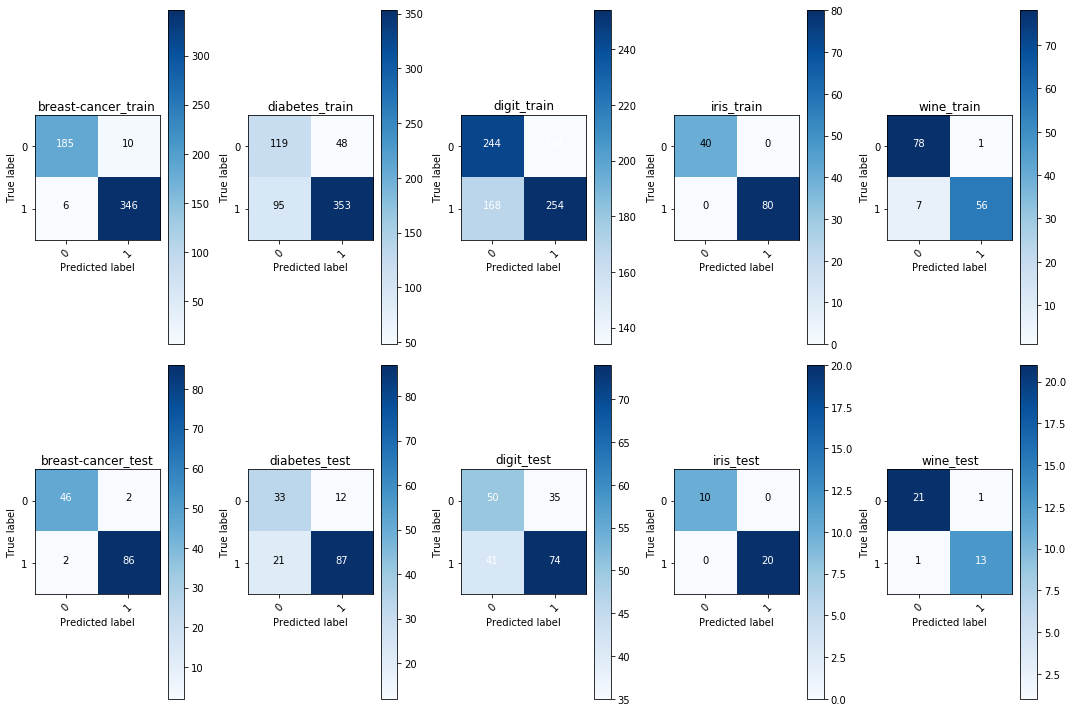

In [6]:
# Module 2: when you get a optimal gamma, this module could help you to train and test a classifier
# This module is used for both linear and rbf kernel experiment

import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# dataset name
input_data_filename = ['breast-cancer', 'diabetes', 'digit', 'iris', 'wine']
# an array for recording result
result = np.array([['Dataset', '$c$', '$\gamma$', '$a_{train}(\%)$', '$a_{test}(\%)$', '$l_{train}$', '$l_{test}$', '$time(ms)$']])

# Create a svm classifier
clf = svm.SVC(kernel=kernel, max_iter=m_i, tol=0.001, probability=True, verbose=False, random_state=0)

# candidate gamma
gamma_star = [1, 0.1, 0.001, 0.1, 0.01]

# Create a plot for drawing confusion matrix
fig, axes=plt.subplots(2, 5, figsize=(15, 10))

for i in range(0, file_count):
    print('Reading data from: ', input_data_filename[i])
    data = np.load('datasets/' + input_data_filename[i] + '.npz')   
    clf.set_params(gamma=gamma_star[i])     
    
    accu_train, accu_test, loss_train, loss_test, t_last, cnf_matrix_train, cnf_matrix_test = train_test(clf, data)

    ''' output parameters '''
    print('c', c, 'gamma', gamma_star[i], 'a_train', accu_train*100,
          'a_test', accu_test*100, 'loss_train', loss_train, 'loss_test', loss_test, 
          'time=train+test', t_last, 'ms')

    # drawing confusion matrix
    plt.subplot(2,5,i+1)
    plot_confusion_matrix(cnf_matrix_train, classes=class_names, normalize=False, title=input_data_filename[i]+'_train')
    plt.subplot(2,5,5+i+1)
    plot_confusion_matrix(cnf_matrix_test, classes=class_names, normalize=False, title=input_data_filename[i]+'_test')

    newrow = np.array([[input_data_filename[i], c, gamma_star[i], accu_train*100, accu_test*100, loss_train, loss_test, t_last]])
    result = np.append(result, newrow, axis=0)

output_csv(result)                  

plt.savefig('svm_rbf_confusion_matrix.eps', dpi=600)        
plt.show()


In [7]:
# Module 3: Cross-validation for choosing a optimal gamma by implementing a cross-validation

import time

import numpy as np
import matplotlib.pyplot as plot

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# initialize some system value
input_data_filename = ['breast-cancer', 'diabetes', 'digit', 'iris', 'wine']
result = np.array([['Dataset', '$m\_i$', '$c$', '$\eta$', '$p$', 'H', 
                    '$a_{test}(\%)$', '$l_{train}$', '$l_{test}$', '$time(ms)$']])

# Create a mlp classifier
# learning_rate='invscaling', 'adaptive
gamma_cand = [1,0.1,0.01,0.001]
clf = svm.SVC(kernel='rbf', max_iter=2000, tol=0.001, verbose=False, random_state=0)

print('Parameters: ', clf.get_params(True))

# Create a plot
fig, axes = plot.subplots(1, 0, figsize=(15, 10))

for i in range(0, file_count):
    print('Reading data from: ', input_data_filename[i])
    data = np.load('datasets/' + input_data_filename[i] + '.npz')
    
    # cross validataion(80% train, 20% test) for H_star
    gamma_star = cross_validation_(data, gamma_cand, i)
    print('gamma_star:', gamma_star)

    

Parameters:  {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 2000, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Reading data from:  breast-cancer
gamma: [1, 0.1, 0.01, 0.001]
g scores: [95.81818182 97.63636364 96.36363636 95.27272727]
loss_train: [0.03228006834433446, 0.08508320062457181, 0.08910893814480034, 0.09281121273240663]
loss_test: [0.12824330056889982, 0.07484926178315157, 0.09220658079888722, 0.09133720299651399]
gamma_star: 2
Reading data from:  diabetes
gamma: [1, 0.1, 0.01, 0.001]
g scores: [75.28455285 78.53658537 66.99186992 66.99186992]
loss_train: [0.41068124870276773, 0.46044074266503854, 0.4906102546205438, 0.4907745728533094]
loss_test: [0.4815613525459003, 0.4842245169560703, 0.4995627027602684, 0.515561495340964]
gamma_star: 2
Reading data from:  digit
gamma: [1, 0.1, 0.01, 0.001]
g scores: [48.    50.75  95